### Import Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
productname = [] 
price = []
rating = []
features = []
original_price = []
Discount = []
Review = []

total_time = time.time()

for i in range(1,106): 
    start_time = time.time()
    URL = f"https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=3f3ea89d-e660-48a9-b1a4-5c9c322da66e&as-searchtext=Lapt&page={i}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'ZFwe0M row'}):
        pname = x.find('div', attrs={'class':'RG5Slk'})
        cost = x.find('div', attrs={'class':'hZ3P6w DeU9vF'})   # discounted price
        rat = x.find('div', attrs={'class':'MKiFS6'})
        specs = x.find('div', attrs={'class':'CMXw7N'})
        op = x.find('div', attrs={'class':'kRYCnD gxR4EY'})
        discount = x.find('div', attrs={'class':'HQe8jr'})
        reviews = x.find('span', attrs={'class':'PvbNMB'})
        

        productname.append(pname.text if pname else np.nan)
        price.append(cost.text if cost else np.nan)
        rating.append(rat.text if rat else np.nan)
        features.append(specs.text if specs else np.nan)
        original_price.append(op.text if op else np.nan)
        Discount.append(discount.text if discount else np.nan)
        Review.append(reviews.text if reviews else np.nan)
        

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))


Page 1 completed in 0.52 seconds
Page 2 completed in 0.45 seconds
Page 3 completed in 0.45 seconds
Page 4 completed in 0.47 seconds
Page 5 completed in 0.46 seconds
Page 6 completed in 0.64 seconds
Page 7 completed in 0.54 seconds
Page 8 completed in 0.61 seconds
Page 9 completed in 0.45 seconds
Page 10 completed in 0.50 seconds
Page 11 completed in 0.51 seconds
Page 12 completed in 0.51 seconds
Page 13 completed in 0.55 seconds
Page 14 completed in 0.46 seconds
Page 15 completed in 0.49 seconds
Page 16 completed in 0.61 seconds
Page 17 completed in 0.58 seconds
Page 18 completed in 0.42 seconds
Page 19 completed in 0.47 seconds
Page 20 completed in 0.42 seconds
Page 21 completed in 0.48 seconds
Page 22 completed in 0.43 seconds
Page 23 completed in 0.45 seconds
Page 24 completed in 0.43 seconds
Page 25 completed in 0.55 seconds
Page 26 completed in 0.67 seconds
Page 27 completed in 0.52 seconds
Page 28 completed in 0.48 seconds
Page 29 completed in 0.49 seconds
Page 30 completed in 0.

In [5]:
laptop =  pd.DataFrame({
    'Product_Name': productname,
    'Discounted_Price': price,
    'Original_Price': original_price,
    'Discount': Discount,
    'Rating': rating,
    'Reviews': Review,
    'Specifications': features
})

In [6]:
laptop.to_csv("laptops_data.csv", index=False)

In [7]:
df = pd.read_csv("laptops_data.csv")
df

,Product_Name,Discounted_Price,Original_Price,Discount,Rating,Reviews,Specifications
0,Lenovo LOQ Essential Intel Core i7 12650HX - (...,"₹79,990","₹1,00,990",20% off,4.4,70 Ratings & 4 Reviews,Intel Core i7 Processor16 GB DDR5 RAMWindows 1...
1,Lenovo Yoga 6 AMD Ryzen 7 Octa Core 7730U - (1...,"₹82,190","₹1,21,690",32% off,4.1,132 Ratings & 8 Reviews,AMD Ryzen 7 Octa Core Processor16 GB LPDDR4X R...
2,Acer Aspire 3 Intel Pentium Quad Core 12th Gen...,"₹32,990","₹35,990",8% off,4.1,675 Ratings & 34 Reviews,Intel Pentium Quad Core Processor (12th Gen)16...
3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,"₹12,999","₹16,298",20% off,4.0,"2,405 Ratings & 177 Reviews",MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹27,899","₹35,999",22% off,3.8,"8,264 Ratings & 718 Reviews",Intel Celeron Dual Core Processor8 GB DDR4 RAM...
...,...,...,...,...,...,...,...
979,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,"₹28,990","₹34,554",16% off,3.7,"7,530 Ratings & 612 Reviews",MediaTek MT8183 Processor4 GB LPDDR4X RAMChrom...
980,Lenovo LOQ 2025 Intel Core i7 14th Gen 14700HX...,"₹1,46,990","₹1,62,090",9% off,4.2,36 Ratings & 1 Reviews,Intel Core i7 Processor (14th Gen)16 GB DDR5 R...
981,Lenovo Legion Pro 5 Intel Core Ultra 7 255HX -...,"₹2,18,490","₹2,65,890",17% off,NaN,NaN,Intel Core Ultra 7 Processor32 GB DDR5 RAM64 b...
982,HP Victus AMD Ryzen 7 Hexa Core 7445HS - (16 G...,"₹73,990","₹84,838",12% off,NaN,NaN,AMD Ryzen 7 Hexa Core Processor16 GB DDR5 RAMW...


In [8]:
df = df.head(len(productname)).reset_index(drop=False)
df

,index,Product_Name,Discounted_Price,Original_Price,Discount,Rating,Reviews,Specifications
0,0,Lenovo LOQ Essential Intel Core i7 12650HX - (...,"₹79,990","₹1,00,990",20% off,4.4,70 Ratings & 4 Reviews,Intel Core i7 Processor16 GB DDR5 RAMWindows 1...
1,1,Lenovo Yoga 6 AMD Ryzen 7 Octa Core 7730U - (1...,"₹82,190","₹1,21,690",32% off,4.1,132 Ratings & 8 Reviews,AMD Ryzen 7 Octa Core Processor16 GB LPDDR4X R...
2,2,Acer Aspire 3 Intel Pentium Quad Core 12th Gen...,"₹32,990","₹35,990",8% off,4.1,675 Ratings & 34 Reviews,Intel Pentium Quad Core Processor (12th Gen)16...
3,3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,"₹12,999","₹16,298",20% off,4.0,"2,405 Ratings & 177 Reviews",MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...
4,4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹27,899","₹35,999",22% off,3.8,"8,264 Ratings & 718 Reviews",Intel Celeron Dual Core Processor8 GB DDR4 RAM...
...,...,...,...,...,...,...,...,...
979,979,HP Chromebook MediaTek MT8183 - (4 GB/32 GB EM...,"₹28,990","₹34,554",16% off,3.7,"7,530 Ratings & 612 Reviews",MediaTek MT8183 Processor4 GB LPDDR4X RAMChrom...
980,980,Lenovo LOQ 2025 Intel Core i7 14th Gen 14700HX...,"₹1,46,990","₹1,62,090",9% off,4.2,36 Ratings & 1 Reviews,Intel Core i7 Processor (14th Gen)16 GB DDR5 R...
981,981,Lenovo Legion Pro 5 Intel Core Ultra 7 255HX -...,"₹2,18,490","₹2,65,890",17% off,NaN,NaN,Intel Core Ultra 7 Processor32 GB DDR5 RAM64 b...
982,982,HP Victus AMD Ryzen 7 Hexa Core 7445HS - (16 G...,"₹73,990","₹84,838",12% off,NaN,NaN,AMD Ryzen 7 Hexa Core Processor16 GB DDR5 RAMW...


In [9]:
# extract numbers using regex
df[['Rating_Count', 'Review_Count']] = (
    df['Reviews']
    .str.extract(r'([\d,]+)\s+Ratings\s*&\s*([\d,]+)\s+Reviews')
)

# remove commas and convert to numeric
df['Rating_Count'] = (
    df['Rating_Count']
    .str.replace(',', '', regex=False)
    .astype('Int64')
)

df['Review_Count'] = (
    df['Review_Count']
    .str.replace(',', '', regex=False)
    .astype('Int64')
)

df.head()

,index,Product_Name,Discounted_Price,Original_Price,Discount,Rating,Reviews,Specifications,Rating_Count,Review_Count
0,0,Lenovo LOQ Essential Intel Core i7 12650HX - (...,"₹79,990","₹1,00,990",20% off,4.4,70 Ratings & 4 Reviews,Intel Core i7 Processor16 GB DDR5 RAMWindows 1...,70,4
1,1,Lenovo Yoga 6 AMD Ryzen 7 Octa Core 7730U - (1...,"₹82,190","₹1,21,690",32% off,4.1,132 Ratings & 8 Reviews,AMD Ryzen 7 Octa Core Processor16 GB LPDDR4X R...,132,8
2,2,Acer Aspire 3 Intel Pentium Quad Core 12th Gen...,"₹32,990","₹35,990",8% off,4.1,675 Ratings & 34 Reviews,Intel Pentium Quad Core Processor (12th Gen)16...,675,34
3,3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,"₹12,999","₹16,298",20% off,4.0,"2,405 Ratings & 177 Reviews",MediaTek Kompanio 520 Processor4 GB LPDDR4X RA...,2405,177
4,4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹27,899","₹35,999",22% off,3.8,"8,264 Ratings & 718 Reviews",Intel Celeron Dual Core Processor8 GB DDR4 RAM...,8264,718


In [10]:
import re

In [11]:
def split_specifications(spec):
    processor = re.search(
        r'(Intel Core i\d|AMD Ryzen \d|Intel Celeron|Qualcomm Snapdragon)',
        spec
    )
    ram = re.search(
        r'(\d+\s?GB\s?(DDR\d|LPDDR\dX?)\s?RAM)',
        spec
    )
    storage = re.search(
        r'(\d+\s?GB\s?(SSD|HDD))',
        spec
    )
    os = re.search(
        r'(Windows\s?\d+)',
        spec
    )

    return pd.Series([
        processor.group(0) if processor else None,
        ram.group(0) if ram else None,
        storage.group(0) if storage else None,
        os.group(0) if os else None
    ])

In [12]:
def split_product_name(product):
    brand = re.search(r'^(ASUS|Lenovo|Acer|HP|DELL)', product, re.I)
    
    processor = re.search(
        r'(Intel\sCore\s[iI]\d|AMD\sRyzen\s\d|Intel\sCeleron|Qualcomm\sSnapdragon)',
        product
    )
    

    return pd.Series([
        brand.group(0) if brand else None,
        processor.group(0) if processor else None
        
    ])

In [13]:
df[['Processor', 'RAM', 'Storage', 'OS']] = df['Specifications'].apply(split_specifications)
df[['Brand', 'Processor']] = (df['Product_Name'].apply(split_product_name))
df

df = df.drop(columns=['Product_Name', 'Specifications'])
df.head()

,index,Discounted_Price,Original_Price,Discount,Rating,Reviews,Rating_Count,Review_Count,Processor,RAM,Storage,OS,Brand
0,0,"₹79,990","₹1,00,990",20% off,4.4,70 Ratings & 4 Reviews,70,4,Intel Core i7,16 GB DDR5 RAM,512 GB SSD,Windows 11,Lenovo
1,1,"₹82,190","₹1,21,690",32% off,4.1,132 Ratings & 8 Reviews,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,None,Windows 11,Lenovo
2,2,"₹32,990","₹35,990",8% off,4.1,675 Ratings & 34 Reviews,675,34,None,16 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
3,3,"₹12,999","₹16,298",20% off,4.0,"2,405 Ratings & 177 Reviews",2405,177,None,4 GB LPDDR4X RAM,None,None,Lenovo
4,4,"₹27,899","₹35,999",22% off,3.8,"8,264 Ratings & 718 Reviews",8264,718,Intel Celeron,8 GB DDR4 RAM,512 GB SSD,Windows 11,Acer


In [14]:
df = df.rename(columns={
    'Discounted_Price': 'Discounted_Price(₹)',
    'Original_Price': 'Original_Price(₹)'
})

df.head()


,index,Discounted_Price(₹),Original_Price(₹),Discount,Rating,Reviews,Rating_Count,Review_Count,Processor,RAM,Storage,OS,Brand
0,0,"₹79,990","₹1,00,990",20% off,4.4,70 Ratings & 4 Reviews,70,4,Intel Core i7,16 GB DDR5 RAM,512 GB SSD,Windows 11,Lenovo
1,1,"₹82,190","₹1,21,690",32% off,4.1,132 Ratings & 8 Reviews,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,None,Windows 11,Lenovo
2,2,"₹32,990","₹35,990",8% off,4.1,675 Ratings & 34 Reviews,675,34,None,16 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
3,3,"₹12,999","₹16,298",20% off,4.0,"2,405 Ratings & 177 Reviews",2405,177,None,4 GB LPDDR4X RAM,None,None,Lenovo
4,4,"₹27,899","₹35,999",22% off,3.8,"8,264 Ratings & 718 Reviews",8264,718,Intel Celeron,8 GB DDR4 RAM,512 GB SSD,Windows 11,Acer


In [15]:
df.columns

Index(['index', 'Discounted_Price(₹)', 'Original_Price(₹)', 'Discount',
       'Rating', 'Reviews', 'Rating_Count', 'Review_Count', 'Processor', 'RAM',
       'Storage', 'OS', 'Brand'],
      dtype='object')

In [16]:
df = df.rename(columns={
    'Discounted_Price': 'Discounted_Price(₹)',
    'Original_Price': 'Original_Price(₹)'
})

df

,index,Discounted_Price(₹),Original_Price(₹),Discount,Rating,Reviews,Rating_Count,Review_Count,Processor,RAM,Storage,OS,Brand
0,0,"₹79,990","₹1,00,990",20% off,4.4,70 Ratings & 4 Reviews,70,4,Intel Core i7,16 GB DDR5 RAM,512 GB SSD,Windows 11,Lenovo
1,1,"₹82,190","₹1,21,690",32% off,4.1,132 Ratings & 8 Reviews,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,None,Windows 11,Lenovo
2,2,"₹32,990","₹35,990",8% off,4.1,675 Ratings & 34 Reviews,675,34,None,16 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
3,3,"₹12,999","₹16,298",20% off,4.0,"2,405 Ratings & 177 Reviews",2405,177,None,4 GB LPDDR4X RAM,None,None,Lenovo
4,4,"₹27,899","₹35,999",22% off,3.8,"8,264 Ratings & 718 Reviews",8264,718,Intel Celeron,8 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,"₹28,990","₹34,554",16% off,3.7,"7,530 Ratings & 612 Reviews",7530,612,None,4 GB LPDDR4X RAM,None,None,HP
980,980,"₹1,46,990","₹1,62,090",9% off,4.2,36 Ratings & 1 Reviews,36,1,Intel Core i7,16 GB DDR5 RAM,None,Windows 11,Lenovo
981,981,"₹2,18,490","₹2,65,890",17% off,NaN,NaN,<NA>,<NA>,None,32 GB DDR5 RAM,None,Windows 11,Lenovo
982,982,"₹73,990","₹84,838",12% off,NaN,NaN,<NA>,<NA>,AMD Ryzen 7,16 GB DDR5 RAM,512 GB SSD,Windows 11,HP


In [17]:
df['Discounted_Price(₹)'] = (
    df['Discounted_Price(₹)']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

In [18]:
df['Original_Price(₹)'] = (
    df['Original_Price(₹)']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


In [19]:
df

,index,Discounted_Price(₹),Original_Price(₹),Discount,Rating,Reviews,Rating_Count,Review_Count,Processor,RAM,Storage,OS,Brand
0,0,79990.0,100990.0,20% off,4.4,70 Ratings & 4 Reviews,70,4,Intel Core i7,16 GB DDR5 RAM,512 GB SSD,Windows 11,Lenovo
1,1,82190.0,121690.0,32% off,4.1,132 Ratings & 8 Reviews,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,None,Windows 11,Lenovo
2,2,32990.0,35990.0,8% off,4.1,675 Ratings & 34 Reviews,675,34,None,16 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
3,3,12999.0,16298.0,20% off,4.0,"2,405 Ratings & 177 Reviews",2405,177,None,4 GB LPDDR4X RAM,None,None,Lenovo
4,4,27899.0,35999.0,22% off,3.8,"8,264 Ratings & 718 Reviews",8264,718,Intel Celeron,8 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,28990.0,34554.0,16% off,3.7,"7,530 Ratings & 612 Reviews",7530,612,None,4 GB LPDDR4X RAM,None,None,HP
980,980,146990.0,162090.0,9% off,4.2,36 Ratings & 1 Reviews,36,1,Intel Core i7,16 GB DDR5 RAM,None,Windows 11,Lenovo
981,981,218490.0,265890.0,17% off,NaN,NaN,<NA>,<NA>,None,32 GB DDR5 RAM,None,Windows 11,Lenovo
982,982,73990.0,84838.0,12% off,NaN,NaN,<NA>,<NA>,AMD Ryzen 7,16 GB DDR5 RAM,512 GB SSD,Windows 11,HP


In [20]:
df.isna().sum()

index                    0
Discounted_Price(₹)      0
Original_Price(₹)       41
Discount                47
Rating                 125
Reviews                125
Rating_Count           125
Review_Count           125
Processor              174
RAM                     25
Storage                310
OS                      49
Brand                  138
dtype: int64

In [21]:
df['Original_Price(₹)'] = df['Original_Price(₹)'].fillna(
    df['Original_Price(₹)'].median()
)


In [22]:
df['Discount'] = df['Discount'].fillna('0% off')


In [23]:
df['Rating'] = df['Rating'].astype(float)

df['Rating'] = df['Rating'].fillna(
    df['Rating'].median()
)


In [24]:
df['Reviews'] = df['Reviews'].fillna('0 Ratings & 0 Reviews')

df['Rating_Count'] = df['Rating_Count'].fillna(0)
df['Review_Count'] = df['Review_Count'].fillna(0)


In [25]:
cat_cols = ['Processor', 'RAM', 'Storage', 'OS', 'Brand']

df[cat_cols] = df[cat_cols].fillna('Unknown')


In [26]:
df.isna().sum()


index                  0
Discounted_Price(₹)    0
Original_Price(₹)      0
Discount               0
Rating                 0
Reviews                0
Rating_Count           0
Review_Count           0
Processor              0
RAM                    0
Storage                0
OS                     0
Brand                  0
dtype: int64

In [27]:

df['Original_Price(₹)']=df['Original_Price(₹)'].astype('int')
df

,index,Discounted_Price(₹),Original_Price(₹),Discount,Rating,Reviews,Rating_Count,Review_Count,Processor,RAM,Storage,OS,Brand
0,0,79990.0,100990,20% off,4.4,70 Ratings & 4 Reviews,70,4,Intel Core i7,16 GB DDR5 RAM,512 GB SSD,Windows 11,Lenovo
1,1,82190.0,121690,32% off,4.1,132 Ratings & 8 Reviews,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,Unknown,Windows 11,Lenovo
2,2,32990.0,35990,8% off,4.1,675 Ratings & 34 Reviews,675,34,Unknown,16 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
3,3,12999.0,16298,20% off,4.0,"2,405 Ratings & 177 Reviews",2405,177,Unknown,4 GB LPDDR4X RAM,Unknown,Unknown,Lenovo
4,4,27899.0,35999,22% off,3.8,"8,264 Ratings & 718 Reviews",8264,718,Intel Celeron,8 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,28990.0,34554,16% off,3.7,"7,530 Ratings & 612 Reviews",7530,612,Unknown,4 GB LPDDR4X RAM,Unknown,Unknown,HP
980,980,146990.0,162090,9% off,4.2,36 Ratings & 1 Reviews,36,1,Intel Core i7,16 GB DDR5 RAM,Unknown,Windows 11,Lenovo
981,981,218490.0,265890,17% off,4.3,0 Ratings & 0 Reviews,0,0,Unknown,32 GB DDR5 RAM,Unknown,Windows 11,Lenovo
982,982,73990.0,84838,12% off,4.3,0 Ratings & 0 Reviews,0,0,AMD Ryzen 7,16 GB DDR5 RAM,512 GB SSD,Windows 11,HP


In [28]:
df.drop(columns='Reviews',axis=1, inplace=True)


In [29]:
df

,index,Discounted_Price(₹),Original_Price(₹),Discount,Rating,Rating_Count,Review_Count,Processor,RAM,Storage,OS,Brand
0,0,79990.0,100990,20% off,4.4,70,4,Intel Core i7,16 GB DDR5 RAM,512 GB SSD,Windows 11,Lenovo
1,1,82190.0,121690,32% off,4.1,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,Unknown,Windows 11,Lenovo
2,2,32990.0,35990,8% off,4.1,675,34,Unknown,16 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
3,3,12999.0,16298,20% off,4.0,2405,177,Unknown,4 GB LPDDR4X RAM,Unknown,Unknown,Lenovo
4,4,27899.0,35999,22% off,3.8,8264,718,Intel Celeron,8 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,28990.0,34554,16% off,3.7,7530,612,Unknown,4 GB LPDDR4X RAM,Unknown,Unknown,HP
980,980,146990.0,162090,9% off,4.2,36,1,Intel Core i7,16 GB DDR5 RAM,Unknown,Windows 11,Lenovo
981,981,218490.0,265890,17% off,4.3,0,0,Unknown,32 GB DDR5 RAM,Unknown,Windows 11,Lenovo
982,982,73990.0,84838,12% off,4.3,0,0,AMD Ryzen 7,16 GB DDR5 RAM,512 GB SSD,Windows 11,HP


In [30]:
df['Discount'] = (
    df['Discount']
    .str.replace('% off', '', regex=False)
    .astype(float)
)

In [31]:
df.rename(columns={'Discount': 'Discount%'}, inplace=True)

In [32]:
df.head()

,index,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Processor,RAM,Storage,OS,Brand
0,0,79990.0,100990,20.0,4.4,70,4,Intel Core i7,16 GB DDR5 RAM,512 GB SSD,Windows 11,Lenovo
1,1,82190.0,121690,32.0,4.1,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,Unknown,Windows 11,Lenovo
2,2,32990.0,35990,8.0,4.1,675,34,Unknown,16 GB DDR4 RAM,512 GB SSD,Windows 11,Acer
3,3,12999.0,16298,20.0,4.0,2405,177,Unknown,4 GB LPDDR4X RAM,Unknown,Unknown,Lenovo
4,4,27899.0,35999,22.0,3.8,8264,718,Intel Celeron,8 GB DDR4 RAM,512 GB SSD,Windows 11,Acer


In [33]:
# Extract storage size (GB)
df['Storage-GB'] = (
    df['Storage']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype('Int64')
)

# Extract memory type (SSD / HDD / etc.)
df['Memory_Type'] = (
    df['Storage']
    .astype(str)
    .str.extract(r'(SSD|HDD|EMMC|NVMe)', expand=False)
)

# Drop original Storage column
df.drop(columns=['Storage'], inplace=True)

# check
df.head()


,index,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Processor,RAM,OS,Brand,Storage-GB,Memory_Type
0,0,79990.0,100990,20.0,4.4,70,4,Intel Core i7,16 GB DDR5 RAM,Windows 11,Lenovo,512,SSD
1,1,82190.0,121690,32.0,4.1,132,8,AMD Ryzen 7,16 GB LPDDR4X RAM,Windows 11,Lenovo,<NA>,NaN
2,2,32990.0,35990,8.0,4.1,675,34,Unknown,16 GB DDR4 RAM,Windows 11,Acer,512,SSD
3,3,12999.0,16298,20.0,4.0,2405,177,Unknown,4 GB LPDDR4X RAM,Unknown,Lenovo,<NA>,NaN
4,4,27899.0,35999,22.0,3.8,8264,718,Intel Celeron,8 GB DDR4 RAM,Windows 11,Acer,512,SSD


In [34]:
# Extract only numbers from RAM and Storage
df['RAM-GB'] = (
    df['RAM']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# Drop old columns
df.drop(columns=['RAM',], inplace=True)

# Check result
df.head()


,index,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Processor,OS,Brand,Storage-GB,Memory_Type,RAM-GB
0,0,79990.0,100990,20.0,4.4,70,4,Intel Core i7,Windows 11,Lenovo,512,SSD,16.0
1,1,82190.0,121690,32.0,4.1,132,8,AMD Ryzen 7,Windows 11,Lenovo,<NA>,NaN,16.0
2,2,32990.0,35990,8.0,4.1,675,34,Unknown,Windows 11,Acer,512,SSD,16.0
3,3,12999.0,16298,20.0,4.0,2405,177,Unknown,Unknown,Lenovo,<NA>,NaN,4.0
4,4,27899.0,35999,22.0,3.8,8264,718,Intel Celeron,Windows 11,Acer,512,SSD,8.0


In [35]:
df['RAM-GB'] = df['RAM-GB'].astype('Int64')
df['Storage-GB'] = df['Storage-GB'].astype('Int64')


In [36]:
# New column order (put these first)
new_order = ['Discounted_Price(₹)','Original_Price(₹)','Discount%','Rating','Rating_Count','Review_Count','Brand', 'OS', 'RAM-GB', 'Storage-GB', 'Processor']

# Reorder dataframe
df = df[new_order + [col for col in df.columns if col not in new_order]]

# Check result
df.head()


,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Brand,OS,RAM-GB,Storage-GB,Processor,index,Memory_Type
0,79990.0,100990,20.0,4.4,70,4,Lenovo,Windows 11,16,512,Intel Core i7,0,SSD
1,82190.0,121690,32.0,4.1,132,8,Lenovo,Windows 11,16,<NA>,AMD Ryzen 7,1,NaN
2,32990.0,35990,8.0,4.1,675,34,Acer,Windows 11,16,512,Unknown,2,SSD
3,12999.0,16298,20.0,4.0,2405,177,Lenovo,Unknown,4,<NA>,Unknown,3,NaN
4,27899.0,35999,22.0,3.8,8264,718,Acer,Windows 11,8,512,Intel Celeron,4,SSD


In [37]:
# Fill Storage-GB with most common storage size
common_storage = df['Storage-GB'].mode()[0]
df['Storage-GB'].fillna(common_storage, inplace=True)

# Fill Memory_Type with most common memory type
common_memory = df['Memory_Type'].mode()[0]
df['Memory_Type'].fillna(common_memory, inplace=True)


C:\Users\sai03\AppData\Local\Temp\ipykernel_15780\3435769543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Storage-GB'].fillna(common_storage, inplace=True)
C:\Users\sai03\AppData\Local\Temp\ipykernel_15780\3435769543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Storage-GB'].fillna(common_storage, inplace=True)
C:\Users\sa

In [38]:
# Find most common processor (excluding 'Unknown')
common_processor = df.loc[df['Processor'] != 'Unknown', 'Processor'].mode()[0]

# Replace Unknown inplace
df['Processor'].replace('Unknown', common_processor, inplace=True)


C:\Users\sai03\AppData\Local\Temp\ipykernel_15780\1332261606.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Processor'].replace('Unknown', common_processor, inplace=True)
C:\Users\sai03\AppData\Local\Temp\ipykernel_15780\1332261606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processor'].replace('Unknown', common_processor,

In [39]:
# Find most common RAM size
common_ram = df['RAM-GB'].mode()[0]

# Fill NaN values inplace
df['RAM-GB'].fillna(common_ram, inplace=True)

# verify
df['RAM-GB'].isna().sum()


C:\Users\sai03\AppData\Local\Temp\ipykernel_15780\1437559567.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RAM-GB'].fillna(common_ram, inplace=True)
C:\Users\sai03\AppData\Local\Temp\ipykernel_15780\1437559567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM-GB'].fillna(common_ram, inplace=True)


np.int64(0)

In [40]:
 

valid_brands = df.loc[df['Brand'] != 'Unknown', 'Brand'].unique()

df.loc[df['Brand'] == 'Unknown', 'Brand'] = np.random.choice(valid_brands)


In [41]:
df.isna().sum()

Discounted_Price(₹)    0
Original_Price(₹)      0
Discount%              0
Rating                 0
Rating_Count           0
Review_Count           0
Brand                  0
OS                     0
RAM-GB                 0
Storage-GB             0
Processor              0
index                  0
Memory_Type            0
dtype: int64

In [42]:
df

,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Brand,OS,RAM-GB,Storage-GB,Processor,index,Memory_Type
0,79990.0,100990,20.0,4.4,70,4,Lenovo,Windows 11,16,512,Intel Core i7,0,SSD
1,82190.0,121690,32.0,4.1,132,8,Lenovo,Windows 11,16,512,AMD Ryzen 7,1,SSD
2,32990.0,35990,8.0,4.1,675,34,Acer,Windows 11,16,512,Intel Core i5,2,SSD
3,12999.0,16298,20.0,4.0,2405,177,Lenovo,Unknown,4,512,Intel Core i5,3,SSD
4,27899.0,35999,22.0,3.8,8264,718,Acer,Windows 11,8,512,Intel Celeron,4,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,28990.0,34554,16.0,3.7,7530,612,HP,Unknown,4,512,Intel Core i5,979,SSD
980,146990.0,162090,9.0,4.2,36,1,Lenovo,Windows 11,16,512,Intel Core i7,980,SSD
981,218490.0,265890,17.0,4.3,0,0,Lenovo,Windows 11,32,512,Intel Core i5,981,SSD
982,73990.0,84838,12.0,4.3,0,0,HP,Windows 11,16,512,AMD Ryzen 7,982,SSD


In [264]:
df.drop(columns=['index'],axis=1,inplace=True)

C:\Users\sai03\AppData\Local\Temp\ipykernel_13440\3748826001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index'],axis=1,inplace=True)


In [43]:
df

,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Brand,OS,RAM-GB,Storage-GB,Processor,index,Memory_Type
0,79990.0,100990,20.0,4.4,70,4,Lenovo,Windows 11,16,512,Intel Core i7,0,SSD
1,82190.0,121690,32.0,4.1,132,8,Lenovo,Windows 11,16,512,AMD Ryzen 7,1,SSD
2,32990.0,35990,8.0,4.1,675,34,Acer,Windows 11,16,512,Intel Core i5,2,SSD
3,12999.0,16298,20.0,4.0,2405,177,Lenovo,Unknown,4,512,Intel Core i5,3,SSD
4,27899.0,35999,22.0,3.8,8264,718,Acer,Windows 11,8,512,Intel Celeron,4,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,28990.0,34554,16.0,3.7,7530,612,HP,Unknown,4,512,Intel Core i5,979,SSD
980,146990.0,162090,9.0,4.2,36,1,Lenovo,Windows 11,16,512,Intel Core i7,980,SSD
981,218490.0,265890,17.0,4.3,0,0,Lenovo,Windows 11,32,512,Intel Core i5,981,SSD
982,73990.0,84838,12.0,4.3,0,0,HP,Windows 11,16,512,AMD Ryzen 7,982,SSD


### UNDERSTAND THE DATA

In [266]:
df.shape

(984, 12)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Discounted_Price(₹)  984 non-null    float64
 1   Original_Price(₹)    984 non-null    int64  
 2   Discount%            984 non-null    float64
 3   Rating               984 non-null    float64
 4   Rating_Count         984 non-null    Int64  
 5   Review_Count         984 non-null    Int64  
 6   Brand                984 non-null    object 
 7   OS                   984 non-null    object 
 8   RAM-GB               984 non-null    Int64  
 9   Storage-GB           984 non-null    Int64  
 10  Processor            984 non-null    object 
 11  Memory_Type          984 non-null    object 
dtypes: Int64(4), float64(3), int64(1), object(4)
memory usage: 96.2+ KB


### Previewing the firt 5 rows

In [268]:
df.head()

,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Brand,OS,RAM-GB,Storage-GB,Processor,Memory_Type
0,62990.0,85290,26.0,3.9,255,17,Lenovo,Windows 11,16,512,Intel Core i5,SSD
1,79990.0,100990,20.0,4.4,68,3,Lenovo,Windows 11,16,512,Intel Core i7,SSD
2,32990.0,35990,8.0,4.1,674,34,Acer,Windows 11,16,512,Intel Core i5,SSD
3,36990.0,42990,13.0,4.1,815,96,Acer,Windows 11,16,512,AMD Ryzen 3,SSD
4,18497.0,26990,31.0,3.9,8,4,Lenovo,Windows 11,8,256,Intel Celeron,SSD


In [269]:
df

,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Brand,OS,RAM-GB,Storage-GB,Processor,Memory_Type
0,62990.0,85290,26.0,3.9,255,17,Lenovo,Windows 11,16,512,Intel Core i5,SSD
1,79990.0,100990,20.0,4.4,68,3,Lenovo,Windows 11,16,512,Intel Core i7,SSD
2,32990.0,35990,8.0,4.1,674,34,Acer,Windows 11,16,512,Intel Core i5,SSD
3,36990.0,42990,13.0,4.1,815,96,Acer,Windows 11,16,512,AMD Ryzen 3,SSD
4,18497.0,26990,31.0,3.9,8,4,Lenovo,Windows 11,8,256,Intel Celeron,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...
979,223990.0,92250,0.0,4.3,0,0,Lenovo,Windows 11,16,512,AMD Ryzen 9,SSD
980,48999.0,57969,15.0,4.2,134,12,HP,Windows 11,8,512,AMD Ryzen 5,SSD
981,48990.0,89999,45.0,4.1,135,25,Lenovo,Windows 11,16,512,Intel Core i7,SSD
982,35099.0,69990,49.0,4.2,1313,92,Lenovo,Windows 11,8,512,Intel Core i3,SSD


### Observation:
 - The preview shows the first 5 rows of the data and helps us check if the file loaded correctly

In [270]:
for i in df.columns:
    print(df[i].value_counts(ascending=True).sort_index())
    print("-"*75)

Discounted_Price(₹)
12999.0     1
13690.0     1
14990.0     1
15990.0     2
16990.0     2
           ..
349900.0    1
372990.0    2
409990.0    1
499990.0    1
548990.0    1
Name: count, Length: 312, dtype: int64
---------------------------------------------------------------------------
Original_Price(₹)
16298     1
22490     1
23990     1
24990     1
26990     1
         ..
329900    1
389900    1
395990    1
399900    1
559990    1
Name: count, Length: 377, dtype: int64
---------------------------------------------------------------------------
Discount%
0.0     28
1.0      4
2.0      6
3.0      6
4.0     10
5.0      7
6.0      8
7.0      9
8.0      4
9.0      5
10.0    16
11.0    21
12.0    16
13.0    14
14.0    14
15.0    16
16.0    13
17.0    20
18.0    27
19.0    52
20.0    64
21.0    61
22.0    69
23.0    68
24.0    63
25.0    17
26.0    80
27.0    57
28.0    17
29.0    16
30.0    12
31.0    13
32.0    16
33.0    22
34.0    13
35.0    13
36.0    13
37.0     5
38.0     9
39.0   

### Previewing the last 5 rows

In [271]:
df.tail()

,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,Brand,OS,RAM-GB,Storage-GB,Processor,Memory_Type
979,223990.0,92250,0.0,4.3,0,0,Lenovo,Windows 11,16,512,AMD Ryzen 9,SSD
980,48999.0,57969,15.0,4.2,134,12,HP,Windows 11,8,512,AMD Ryzen 5,SSD
981,48990.0,89999,45.0,4.1,135,25,Lenovo,Windows 11,16,512,Intel Core i7,SSD
982,35099.0,69990,49.0,4.2,1313,92,Lenovo,Windows 11,8,512,Intel Core i3,SSD
983,41999.0,46700,10.0,4.1,1836,235,ASUS,Windows 10,8,512,Intel Core i5,SSD


### Observation:
 - The preview shows the last 5 rows of the data and helps us check if the file loaded correctly

In [272]:
df.describe()

,Discounted_Price(₹),Original_Price(₹),Discount%,Rating,Rating_Count,Review_Count,RAM-GB,Storage-GB
count,984.000000,984.000000,984.000000,984.000000,984.0,984.0,984.0,984.0
mean,83293.000000,105036.913618,22.561992,4.246646,746.550813,61.037602,15.380081,498.341463
std,53198.596211,57840.917357,9.741638,0.244968,1528.379036,127.037645,6.415413,58.850685
min,12999.000000,16298.000000,0.000000,2.700000,0.0,0.0,4.0,128.0
25%,48976.250000,66065.000000,19.000000,4.200000,16.0,1.0,16.0,512.0
50%,69990.000000,92250.000000,23.000000,4.300000,98.5,9.0,16.0,512.0
75%,113364.000000,131290.000000,27.000000,4.400000,652.25,54.25,16.0,512.0
max,548990.000000,559990.000000,60.000000,5.000000,15980.0,1274.0,64.0,512.0


### Observation:
 - Describe shows the summary stats

In [273]:
df.dtypes

Discounted_Price(₹)    float64
Original_Price(₹)        int64
Discount%              float64
Rating                 float64
Rating_Count             Int64
Review_Count             Int64
Brand                   object
OS                      object
RAM-GB                   Int64
Storage-GB               Int64
Processor               object
Memory_Type             object
dtype: object

### Data Cleaning & Manipulation
### Handle missing values

In [274]:
df.isnull().sum()

Discounted_Price(₹)    0
Original_Price(₹)      0
Discount%              0
Rating                 0
Rating_Count           0
Review_Count           0
Brand                  0
OS                     0
RAM-GB                 0
Storage-GB             0
Processor              0
Memory_Type            0
dtype: int64

In [275]:
df = df.dropna()

In [276]:
df.isnull().sum()

Discounted_Price(₹)    0
Original_Price(₹)      0
Discount%              0
Rating                 0
Rating_Count           0
Review_Count           0
Brand                  0
OS                     0
RAM-GB                 0
Storage-GB             0
Processor              0
Memory_Type            0
dtype: int64

### Handle Duplicates

In [277]:
df.duplicated().sum()

np.int64(388)

### Observation:
 - There are no duplicates

In [279]:
df.columns

Index(['Discounted_Price(₹)', 'Original_Price(₹)', 'Discount%', 'Rating',
       'Rating_Count', 'Review_Count', 'Brand', 'OS', 'RAM-GB', 'Storage-GB',
       'Processor', 'Memory_Type'],
      dtype='object')

In [280]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [281]:
df.groupby('Discounted_Price(₹)')['Rating'].mean().sort_values(ascending=False)

Discounted_Price(₹)
161999.0    5.0
269990.0    5.0
198990.0    5.0
138990.0    5.0
107990.0    4.9
           ... 
76490.0     3.6
64999.0     3.4
75000.0     3.4
25450.0     3.4
99490.0     2.7
Name: Rating, Length: 312, dtype: float64

### Observation:
 - The analysis shows that certain discounted price points have higher average ratings, indicating that customer satisfaction is stronger at specific price levels rather than increasing uniformly with price.

In [282]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [283]:
df[['Discounted_Price(₹)', 'Rating']].corr()

,Discounted_Price(₹),Rating
Discounted_Price(₹),1.000000,0.306902
Rating,0.306902,1.000000


### Observation:
 - The correlation between discounted price and rating is weak, indicating that higher-priced products do not necessarily receive higher customer ratings.

### Select Numerical Columns

In [284]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Discounted_Price(₹)', 'Original_Price(₹)', 'Discount%', 'Rating',
       'Rating_Count', 'Review_Count', 'RAM-GB', 'Storage-GB'],
      dtype='object')

### Observation:
 - The selected numeric columns represent quantitative features in the dataset that are suitable for statistical analysis, correlation, and visualization.

### IQR & Outlier Insight

In [285]:
Q1 = df['Discounted_Price(₹)'].quantile(0.25)
Q3 = df['Discounted_Price(₹)'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(64387.75)

### Calculate Q1, Q3 and IQR (IQ Values)

In [286]:
iqr_values = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[col] = {"Q!":Q1,"Q3":Q3,"IQR":IQR}
iqr_df = pd.DataFrame(iqr_values).T
iqr_df

,Q!,Q3,IQR
Discounted_Price(₹),48976.25,113364.00,64387.75
Original_Price(₹),66065.00,131290.00,65225.00
Discount%,19.00,27.00,8.00
Rating,4.20,4.40,0.20
Rating_Count,16.00,652.25,636.25
Review_Count,1.00,54.25,53.25
RAM-GB,16.00,16.00,0.00
Storage-GB,512.00,512.00,0.00


### Detect Outliers Using IQR Method

In [287]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[1]
outliers

{'Discounted_Price(₹)': 12,
 'Original_Price(₹)': 12,
 'Discount%': 12,
 'Rating': 12,
 'Rating_Count': 12,
 'Review_Count': 12,
 'RAM-GB': 12,
 'Storage-GB': 12}

### Observation:
 - The IQR method identified the presence of outliers across multiple numerical columns, indicating variability and extreme values that may influence statistical analysis.

### Visualization
### Univariate Analysis

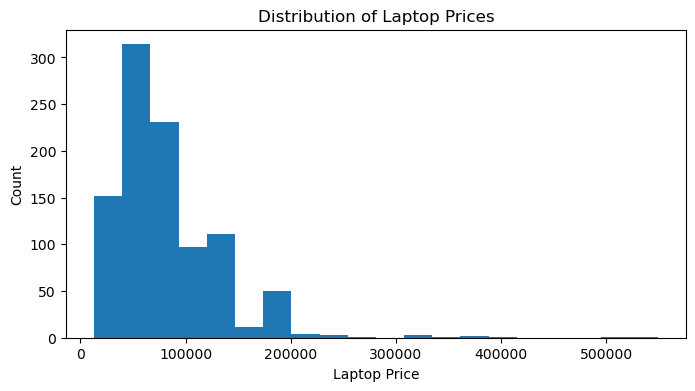

In [288]:
plt.figure(figsize=(8,4))
plt.hist(df['Discounted_Price(₹)'], bins=20)
plt.xlabel("Laptop Price")
plt.ylabel("Count")
plt.title("Distribution of Laptop Prices")
plt.show()

### Observation:
 - The histogram shows that most laptops are concentrated in the lower to mid price range, with fewer models available at higher price levels.

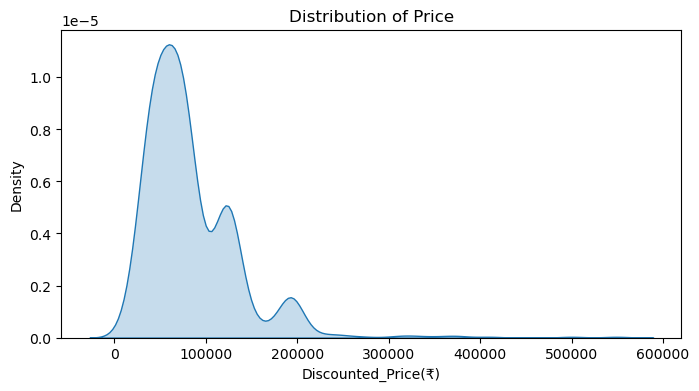

In [289]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['Discounted_Price(₹)'], fill=True)
plt.title("Distribution of Price")
plt.show()

### Observation:
 - The KDE plot indicates a right-skewed price distribution, showing that most laptops are priced in the lower range with a long tail toward higher prices.

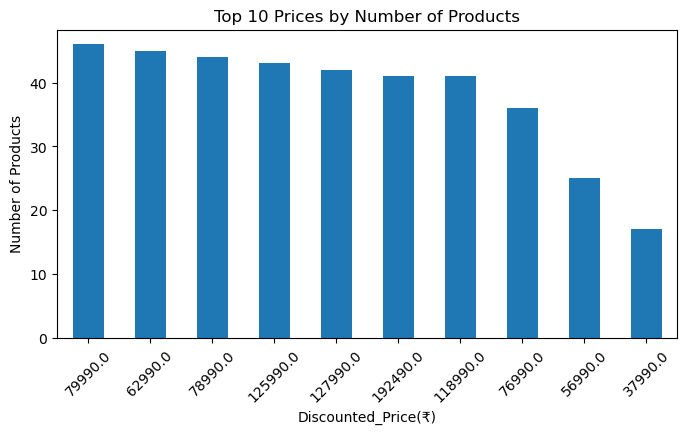

In [290]:
top_10 = df['Discounted_Price(₹)'].value_counts().head(10)

plt.figure(figsize=(8,4))
top_10.plot(kind='bar')
plt.xlabel("Discounted_Price(₹)")
plt.ylabel("Number of Products")
plt.title("Top 10 Prices by Number of Products")
plt.xticks(rotation=45)
plt.show()

### Observation:
 - The bar chart shows that a small set of discounted price points dominates the market, with these prices having the highest number of laptop products.

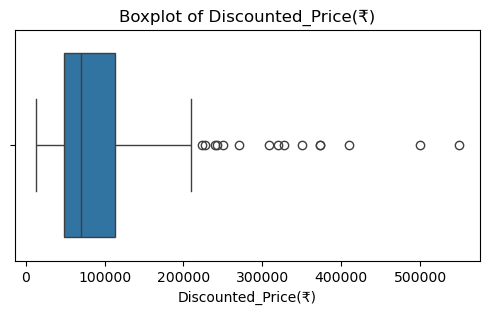

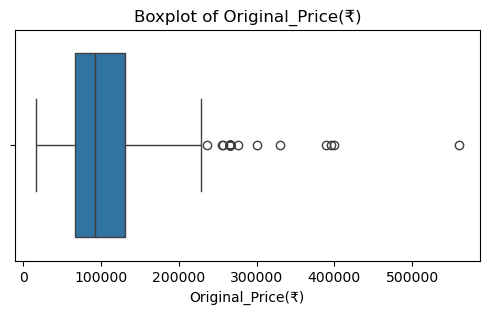

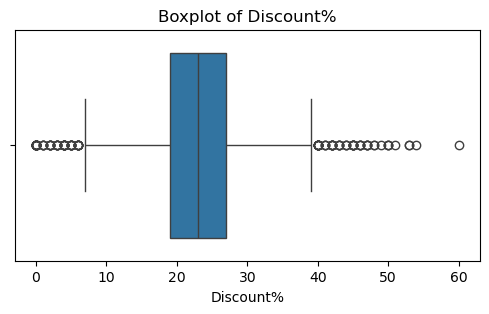

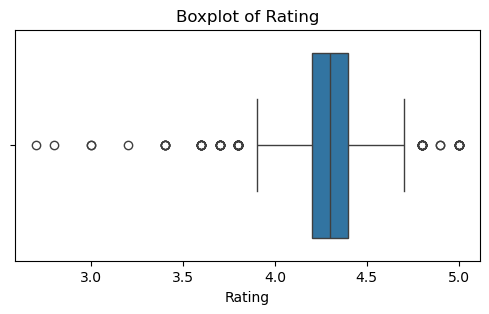

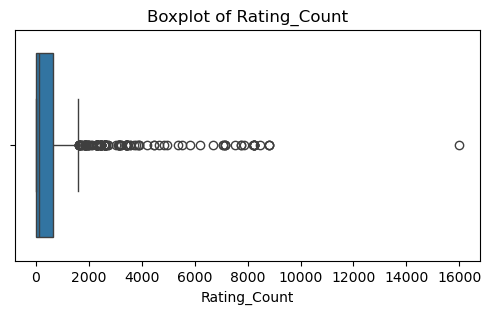

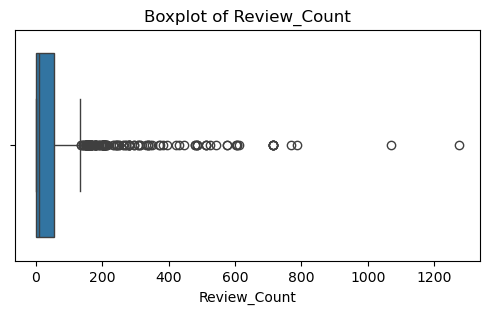

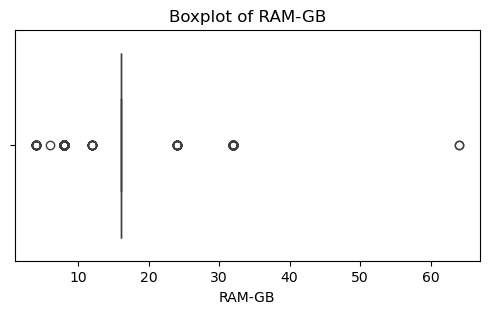

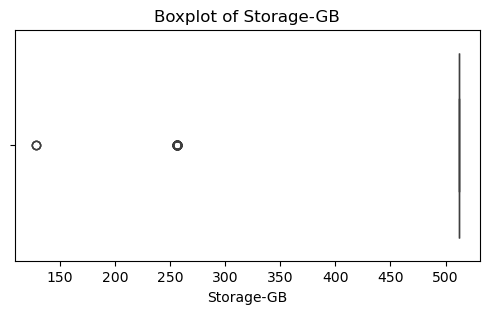

In [291]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df[col].nunique() > 1:   
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

### Observation:
 - The boxplots reveal the spread and presence of outliers across numerical features, highlighting variability in prices, ratings, and other quantitative attributes.


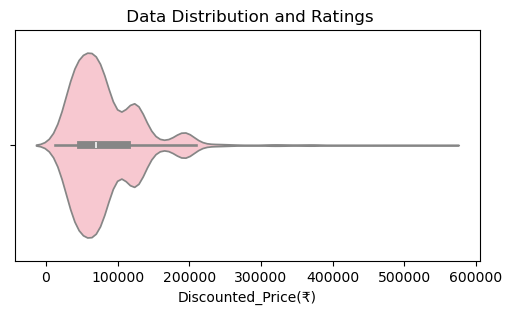

In [292]:
plt.figure(figsize=(6,3))
sns.violinplot(x=df['Discounted_Price(₹)'],color='pink')
plt.title(" Data Distribution and Ratings")
plt.show()

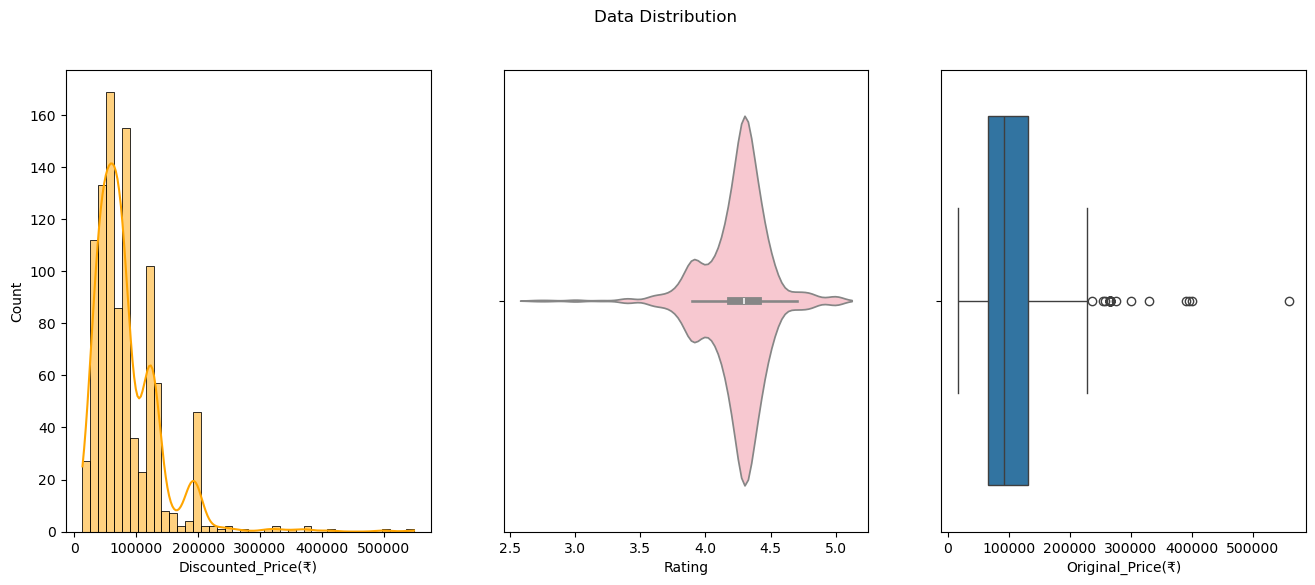

In [293]:
plt.figure(figsize=(16,6))
plt.suptitle("Data Distribution")

plt.subplot(1,3,1)
sns.histplot(df['Discounted_Price(₹)'],kde=True,color='orange')

plt.subplot(1,3,2)
sns.violinplot(x=df['Rating'],color='pink')

plt.subplot(1,3,3)
sns.boxplot(x=df['Original_Price(₹)'])
plt.show()

### Observation:
 - The combined plots show that discounted prices are right-skewed, while ratings are tightly clustered with limited variation and a few outliers.

### Bivariate Analysis

In [294]:
df_scatter = df[['Discounted_Price(₹)','Discount%']].dropna()

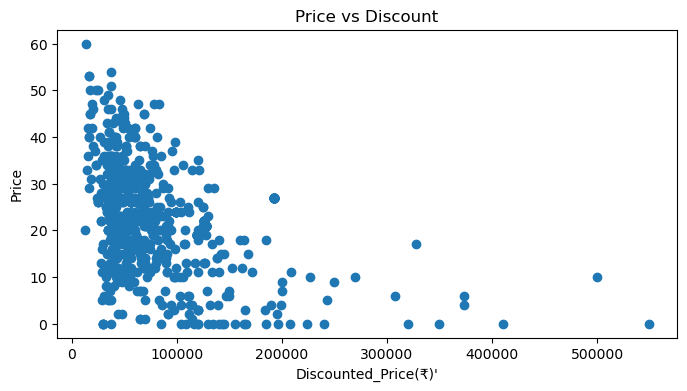

In [295]:
plt.figure(figsize=(8,4))
plt.scatter(df_scatter['Discounted_Price(₹)'], df_scatter['Discount%'])
plt.xlabel("Discounted_Price(₹)'")
plt.ylabel("Price")
plt.title("Price vs Discount")
plt.show()

### Observation:
 - The scatter plot indicates a positive relationship where higher discounted prices generally correspond to higher discount values, though with noticeable variability.


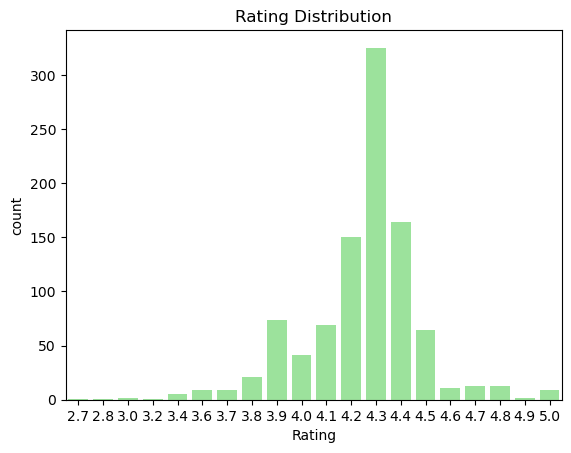

In [296]:
sns.countplot(x=df['Rating'],color='lightgreen')
plt.title("Rating Distribution")
plt.show()

### Observation:
 - The count plot shows that most laptops receive ratings clustered around higher values, indicating generally positive customer feedback.

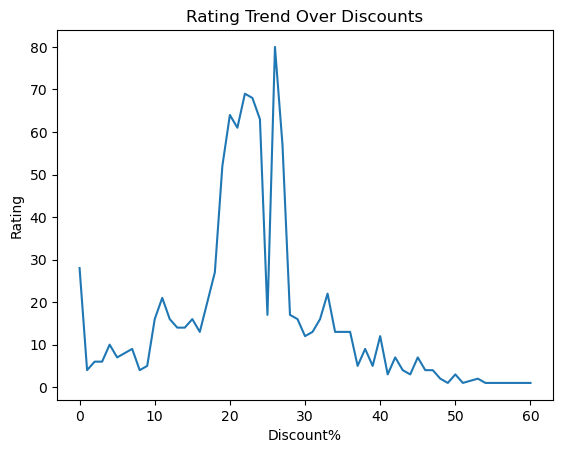

In [297]:
df.groupby('Discount%')['Rating'].count().plot()
plt.xlabel("Discount%")
plt.ylabel("Rating")
plt.title("Rating Trend Over Discounts")
plt.show()

### Observation:
 - The plot indicates that mid-range discounts tend to have a higher number of rated products, suggesting greater customer engagement at those discount levels.

### Multivariate Analysis

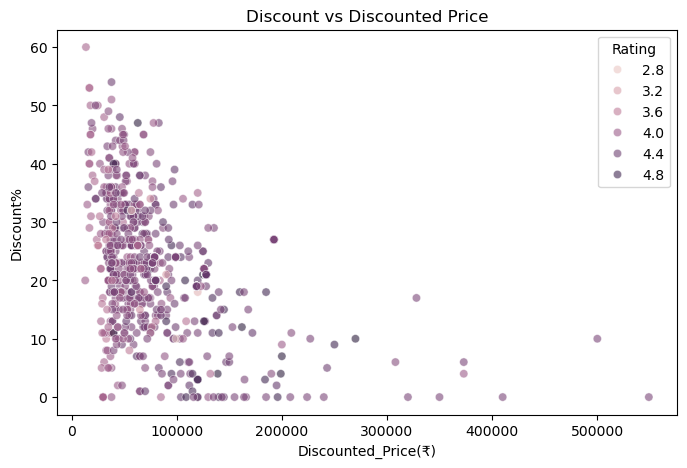

In [298]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discounted_Price(₹)',y='Discount%',hue='Rating',alpha=0.6)
plt.title('Discount vs Discounted Price')
plt.show()

### Obsevation:
 - The scatter plot shows that higher discounts generally occur at higher discounted prices, with customer ratings spread across price–discount combinations rather than concentrated in a single range.

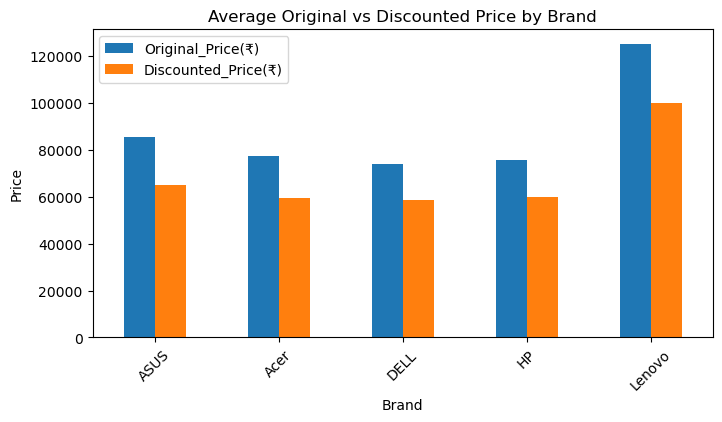

In [299]:
price_df = df[['Brand', 'Original_Price(₹)', 'Discounted_Price(₹)']].groupby('Brand').mean().reset_index()

price_df.plot(
    x='Brand',
    y=['Original_Price(₹)', 'Discounted_Price(₹)'],
    kind='bar',
    figsize=(8,4))

plt.title("Average Original vs Discounted Price by Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

### Observation:
 - On average, all brands have lower discounted prices than their original prices, showing consistent price reductions across brands.

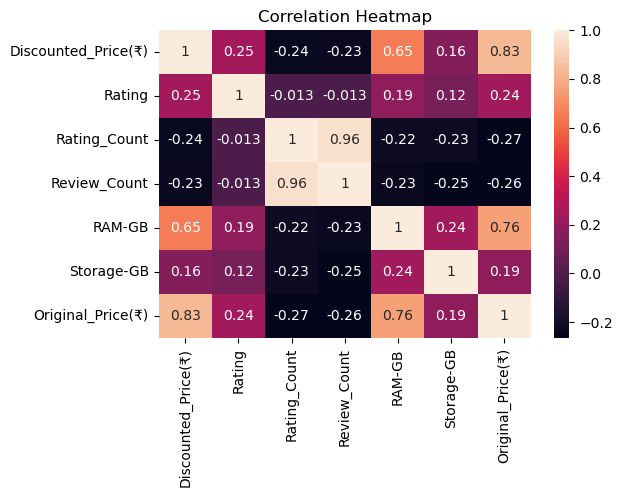

In [44]:
corr_df = df[['Discounted_Price(₹)','Rating','Rating_Count','Review_Count','RAM-GB','Storage-GB','Original_Price(₹)']].dropna()
plt.figure(figsize=(6,4))
sns.heatmap( corr_df.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Observation:
The heatmap shows that Original_Price and Discounted_Price are highly positively correlated, while Rating, and Year have weak correlations with the prices.


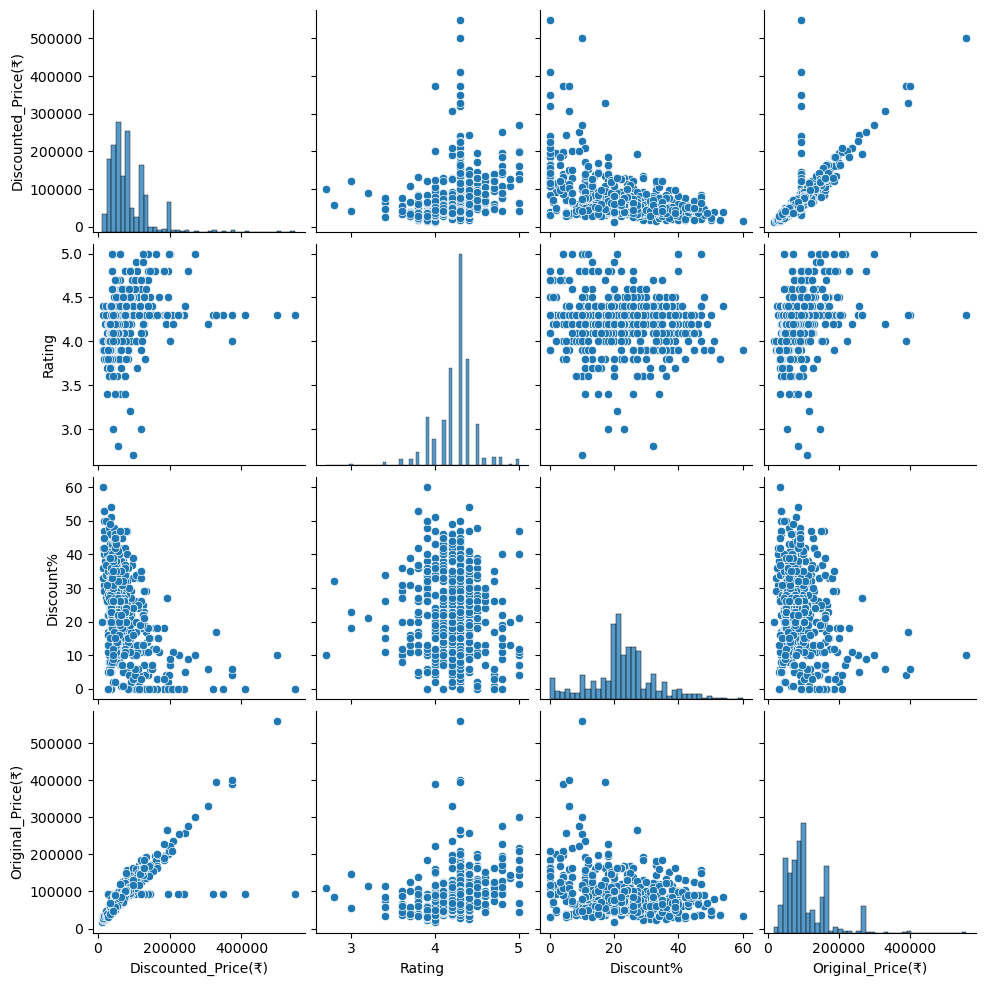

In [301]:
sns.pairplot(df[['Discounted_Price(₹)','Rating','Discount%','Original_Price(₹)']])
plt.show()

### Observation:
The pairplot shows that higher discounts generally correspond to lower discounted prices and original prices while Rating and Reviews show weak relationships with price and discount.

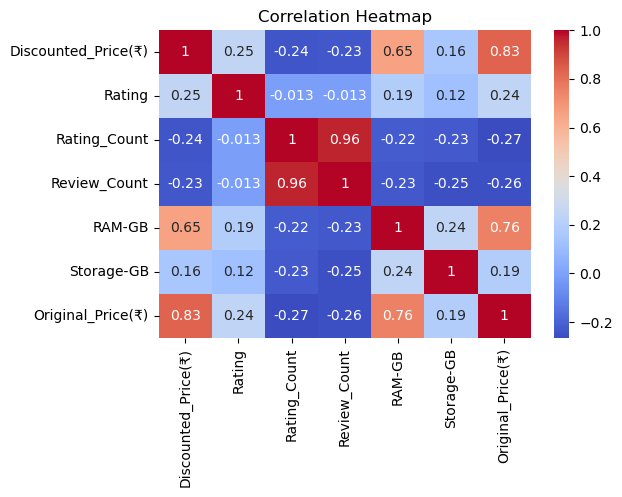

In [45]:
corr_df = df[['Discounted_Price(₹)','Rating','Rating_Count','Review_Count','RAM-GB','Storage-GB','Original_Price(₹)']].dropna()
plt.figure(figsize=(6,4))
sns.heatmap( corr_df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Observation:
The heatmap indicates a strong positive correlation between Original_Price and Discounted_Price, while Rating, and Year show weak or negligible correlation with pricing.